# 37. Оценка внутреннего коэффициента воспроизводства. Решение нелинейного уравнения

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

In [29]:
t=[4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]
l=[0.87, 0.83, 0.81, 0.80, 0.79, 0.77, 0.74, 0.66, 0.59, 0.52, 0.45, 0.36, 0.29, 0.25, 0.19]
m=[20.0, 23.0, 15.0, 12.5, 12.5, 14.0, 12.5, 14.5, 11.0, 9.5, 2.5, 2.5, 2.5, 4.0, 1.0]

|t||l_t||m_t|
|----||----||----|
|4.5 ||0.87||20.0|
|5.5 ||0.83||23.0|
|6.5 ||0.81||15.0|
|7.5 ||0.80||12.5|
|8.5 ||0.79||12.5|
|9.5 ||0.77||14.0|
|10.5||0.74||12.5|
|11.5||0.66||14.5|
|12.5||0.59||11.0|
|13.5||0.52||9.5|
|14.5||0.45||2.5|
|15.5||0.36||2.5|
|16.5||0.29||2.5|
|17.5||0.25||4.0|
|18.5||0.19||1.0|

In [30]:
R0=0
i=0
while i<15:
    R0=R0+l[i]*m[i]
    i=i+1
print(f"Чистый коэффицент производства={R0}")
#В данном случае используется цикл while и точное количество t (которое в данной задаче равно 15)

Чистый коэффицент производства=113.48499999999997


Более универсальный случай можно сделать через for i in range

In [31]:
R0=0
i=1
for i in range(len(t)):
    R0=R0+l[i]*m[i]
print(f"Чистый коэффицент производства={R0}")

Чистый коэффицент производства=113.48499999999997


Дальше мы должны построить график данной левой функции

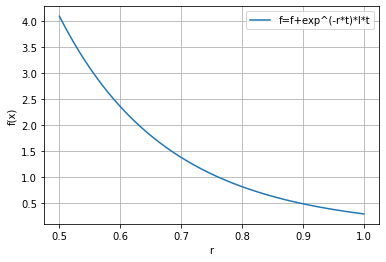

In [51]:
# r - массив значений внутреннего коэффициента естественной репродукции
r = np.linspace(0.5, 1, 500)
# f - массив, в который будем записывать значения функции на соответствующем элементе массива r и который будет равняться левой функции
f = np.linspace(0, 0, 500)

# для каждого r считаем значение функции f
for i in range(len(f)):
    for j in range(len(t)):
        f[i] = f[i]+np.exp(-r[i] * t[j]) * l[j] * m[j]

# объявляем объект для присвания графика
Graphic = plt.figure()
# добавляем сетку
ax = Graphic.add_subplot(1, 1, 1)
ax.grid(which='both')
# добавляем график левой функции
line1 = ax.plot(r, f, label='f=f+exp^(-r*t)*l*t')
# подписываем оси ox и oy
plt.xlabel("r")
plt.ylabel("f(x)")
# добавляем легенду графика функции
ax.legend()
# выводим график
plt.show()

Дальше создаем функцию для определения внутреннего коэффициента

In [54]:
def func(x):
    # иниициализируем переменную для нахождения r через R0
    p = 0
    for j in range(len(t)):
        # для каждого возраста находим значение выражения согласно формуле и суммируем эти значения
        p =p+np.exp(-x * t[j]) * l[j] * m[j]
    p -= 1
    return p

In [55]:
print("внутренний коэффициент естественной репродукции r = ",brentq(func, a=0.5, b=1))

внутренний коэффициент естественной репродукции r =  0.7619840766979892


Вывод:В работе, проведенной над статьей из 
    [Birch L.C. The intrinsic rate of natural increase of an insect population. The Journal of Animal Ecology (1948): 15-26],
нужно было высчитать коэффицент естественной репродукции особей рисового жука долгоносика с учетом проведенных исследований.
 Используя формулу   $$R_0 = \sum_{t} l_t m_t$$, где 
    $t$ - возраст в неделях
    $l_t$ - вероятность дожития до этого возраста
    $m_t$ - среднее число потомков женского пола, рожденных одной особью в этом возрасте 
для определения чистого коэффицента воспроизводства (при неизменяемых условиях), и получили, что R0=113.5 (или точнее 113.48)
Дальше для получения внутреннего коэффицента естественной репродукции r, мы построили график левой функции$$\sum_t e^{-rt} l_t m_t = 1.$$
После этого, используя scipy.optimize.brentq. мы решили данное нелинейное уравнение и получили значение r, которое равно 0.762 (или более точное число 0.76198)